## Brayan Arturo Gonzalez Barron 1620548
# Importamos librerias

In [1]:

import pandas as pd
import matplotlib as plt
import seaborn as sn


importamos o cargamos la base de datos a trabajar en Data frame con nombre asignado de df

In [2]:
df = pd.read_csv("/home/brayan-gzz/Descargas/winemag-data_first150k.csv", encoding='utf8')

Contamos con 150930 registros y 11 columnas, una cantidad considerable de registros para poder tomar muestras y graficar 

In [3]:
df.shape

(150930, 11)

Mostramos Los primeros 30 registros para darnos una idea de los datos con los que estamos tratando y tambien darnos una idea de las posibles deduciones o posibles preguntas que podriamos responder

In [4]:
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


Obtenemos los tipos de cada clomuna para ver de que manera los podemos trabajar los datos y que modificaciones les podemos hacer para nuestra conveniencia, que por cierto podemos algunos pasarlos a float lo que nos representan numeros para trabajar con puros numeros flotantes y no hacer conversiones.

In [5]:
df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Mostramos las columnas separadas de las filas para entrar en un contexto mas certero de la base de datos y podemos observar que tenemos el numero de registro, el pais, descripcion, precio, puntos, regiones, variedad que son los mas relevantes, En nuestro caso la ciudad, los puntos y el precio podrian ayudarnos para medir la relacion que exiten entre el precio y puntiacion (calidad) por closterizada por alguna zona en particular

In [6]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Observamos que tantos datos nulos tenemos, y determinar que como quedaria la muestra resultante despues de eliminar las filas con datos null o NaN

In [7]:
df.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

Eliminamos las filas con datos null para reducir el numero de registros y solo trabajar con aquellos datos que tengan una integridad completa

In [7]:
df_drop = df.dropna()

Y observamos cuantos registros nos quedaron despues de limpiar la base de esta manera

In [8]:
df=df_drop
df.shape

(39241, 11)

# Analisis de Estadisticos

Podemos observar que tenemos 39241 registros confirmados, ya que en la instruccion pasada tambien nos arroja el mismo numero, con esto nosotros nos damos cuentna con cuantos datos vamos a trabajar aproxiamdamente, lo que nos daria a entender que tenemos una muestra de la poblacion incial

In [9]:
df['description'].count()

39241

Tenemos una serie de estadisticos que nos que nos arrojan la media, el promedio, el valor minimo  y el la maxima puntuacion (todo esto con base a la puntuacion solamente) Aqui solo los mostramos para tener una idea general sobre estos estadisticos y ver cuales son los indicadores que actuan sobre este parametro

In [10]:
df['points'].describe()

count    39241.000000
mean        88.359981
std          3.438542
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

Confirmamos la mediana o el valor que mas se repite lo que nos dice que que el valor que mas se repite en esta muestra para las puntuaciones es 88.0, lo que en cristiano quiere decir que la mayoria de las personas dio esa calificacion, por lo que nos dice que la calidad en general es buena pero lo que no sabes de donde provienen o de donde se genera esa mediana. que sonas y sobre que precios se brinda esa calificacion

In [11]:
df['points'].median()

88.0

In [12]:
del df['Unnamed: 0']

Con la correlacion no arroja la relacion lineal que existe entre los puntos y el precio con la cual determinamos como se relacionan estos dos tipos de datos sobre la muestra.

In [15]:
df.corr()

,points,price
points,1.000000,0.435628
price,0.435628,1.000000


Aqui obtenemos la variacion de los datos o que tanto varia que hay entre los puntos y el precio, lo que nos indica que si hay mucha de ella en nuestros datos ya que entre mas alejados del 0 mas variacion existe

In [16]:
df.cov()


,points,price
points,11.823571,40.019361
price,40.019361,713.773906


Sacacmos desviaciones estandar de de la puntuacion y el precio lo que nos dice que en el caso de los puntos la distancia que hay entre estos datos no es tanta a comparacion del precio que estan mas separados. Por lo tanto podriamos tener una vista mas clara del comportamiento unitario de cada una de estas

In [21]:
df['points'].std()

3.4385419413760276

In [22]:
df['price'].std()

26.716547418483284

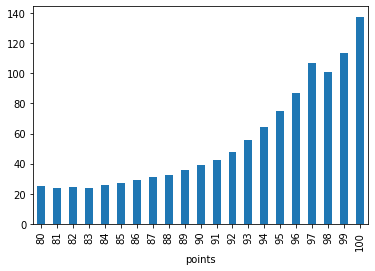

In [23]:
%matplotlib inline 
df.groupby('points')['price'].mean().plot.bar()

En esta grafica tenemos una correlacion entre los puntos y el precio de tal manera que apreciamos un compurtamiento no lineal con respecto a las cuspides de las barras entre mayor sea la puntuacion los el precio aumenta

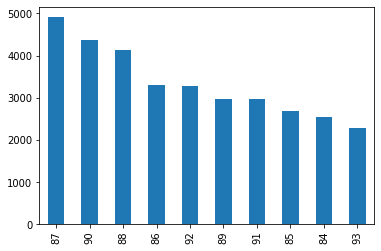

In [24]:
df['points'].value_counts().head(10).plot.bar()

Sobre esta grafica podemos observar cuanto las calficiaciones mas frecuentes en todos los vinos 

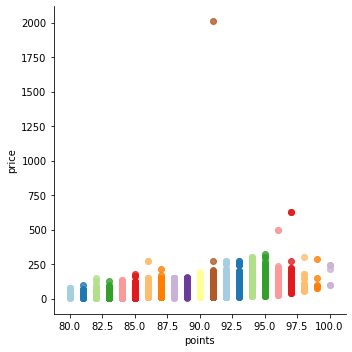

In [34]:
sn.lmplot(x='points', y='price', data=df[df['province']=='California'], fit_reg=False, hue='points',legend=False,palette='Paired')


En esta Grafica podemos observar que aun sigue habiendo una gran cantidad de datos incluso solo tomamos los de california, pero podemos decir que la calidad del vino esta directamente relacionada con el precio, por lo tanto como hay mejor calificacion entre los datos de entre 90 a 95 es razonable or que no hay hay un precio razonable, en cuanto mas barato mas deciene la calificacion, hay un solo punto que se mueve entre el 90 y el 92.5 con un precio muy elevado y los de puntuacion de 100 no hay muchos puntos encontrados

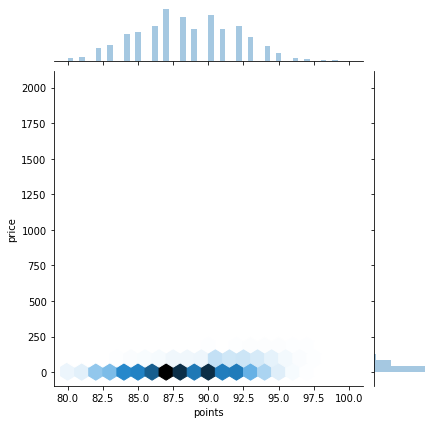

In [39]:
sn.jointplot(x='points', y='price', data=df[df['country'] == 'US'], kind='hex', 
              gridsize=20)

En esta Grafica podemos obserbar las glomeraciones que se dan solamente en el pais de estados unidos, osea la concentracion de datos que existen en este pais, donde observamos que las que es que las puntiaciones con base un precio por debajo de los 250 son 86, 87.5 y 90, donde lla calidad es mas notoria